<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>EasyVisa Project</center></h1>

### Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help shortlist candidates with higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

    1. Facilitate the process of visa approvals.
    2. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.



### Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

    case_id: ID of each visa application
    continent: Information of continent the employee
    education_of_employee: Information of education of the employee
    has_job_experience: Does the employee have any job experience? Y= Yes; N = No
    requires_job_training: Does the employee require any job training? Y = Yes; N = No
    no_of_employees: Number of employees in the employer's company
    yr_of_estab: Year in which the employer's company was established
    region_of_employment: Information of foreign worker's intended region of employment in the US.
    prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
    unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
    full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
    case_status: Flag indicating if the Visa was certified or denied


In [ ]:
# to manipulate data
import numpy as np
import pandas as pd

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to split data into train and test
from sklearn.model_selection import train_test_split

# to create a decision tree
from sklearn.tree import DecisionTreeClassifier

# to create ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
 )

# to evaluate models
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# to tune  models
from sklearn.model_selection import GridSearchCV


#---------------------------------------------------------
# Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load the Data Set
visa=pd.read_csv("EasyVisa.csv")


In [ ]:
# copying data to another variable to avoid any changes to original data
data=visa.copy()

### Overview

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.shape

(25480, 12)

##### Observation : Visa data has 25480 rows and 12 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


##### Observation : There are 9 Object type and 3 column are numeric in nature

In [ ]:
## check the null values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

##### Observation : There are no null values

In [ ]:
data.duplicated().sum()

np.int64(0)

##### Observation : There are no duplicate values

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Observation :

> The no of employees has a mean of 5,667 and median of 2,109. This indicates that the distribution is skewed

> There are negative values in the no of employees which could be an error

> yr of estab ranges from 1800 to 2016

> prevailing wage ranges from 2 to 319,210 and distribution is skewed

> The most popular continent is Asia

> The most popular educational level is Bachelor


### Checking negative values of number of employees

In [ ]:
data['no_of_employees'].apply(lambda x: (x<0)).sum()

np.int64(33)

##### Observation :
> since number of employees in a company can not be  negative, we will consider it as a data entry error

> we have 33 cases like this

> we will take the absolute value of those values

In [ ]:
data['no_of_employees']=abs(data['no_of_employees'])

In [ ]:
data['no_of_employees'].apply(lambda x: (x<0)).sum()

np.int64(0)

##### Observation : Now there are no negative values

In [ ]:
obj_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in obj_col:
    print(data[column].value_counts(True))
    print("-" * 50)

case_id
EZYV25480    0.000039
EZYV01       0.000039
EZYV02       0.000039
EZYV03       0.000039
EZYV04       0.000039
               ...   
EZYV13       0.000039
EZYV12       0.000039
EZYV11       0.000039
EZYV10       0.000039
EZYV09       0.000039
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N    0.884027
Y    0.115973
Name: proportion, 

##### Observation :
> Case id can be removed as it is not needed

> 66% of the applications are from Asians

> 40% of the applications are from bachelor's degree

> 58% of the applicants have job experience

> 88% of the applicants do not require job training

> 28% of the applicants have their worksite in the Northeast region of the US

> 90% of the applicants have a yearly unit of wage

> 89% of the visa applications are having a full-time job positions

> 66% of the case status  are certified

In [ ]:
#Drop the case_id column
data.drop(["case_id"], axis=1, inplace=True)

##  Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# for numerical variables
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### 1 Observations on number of employees

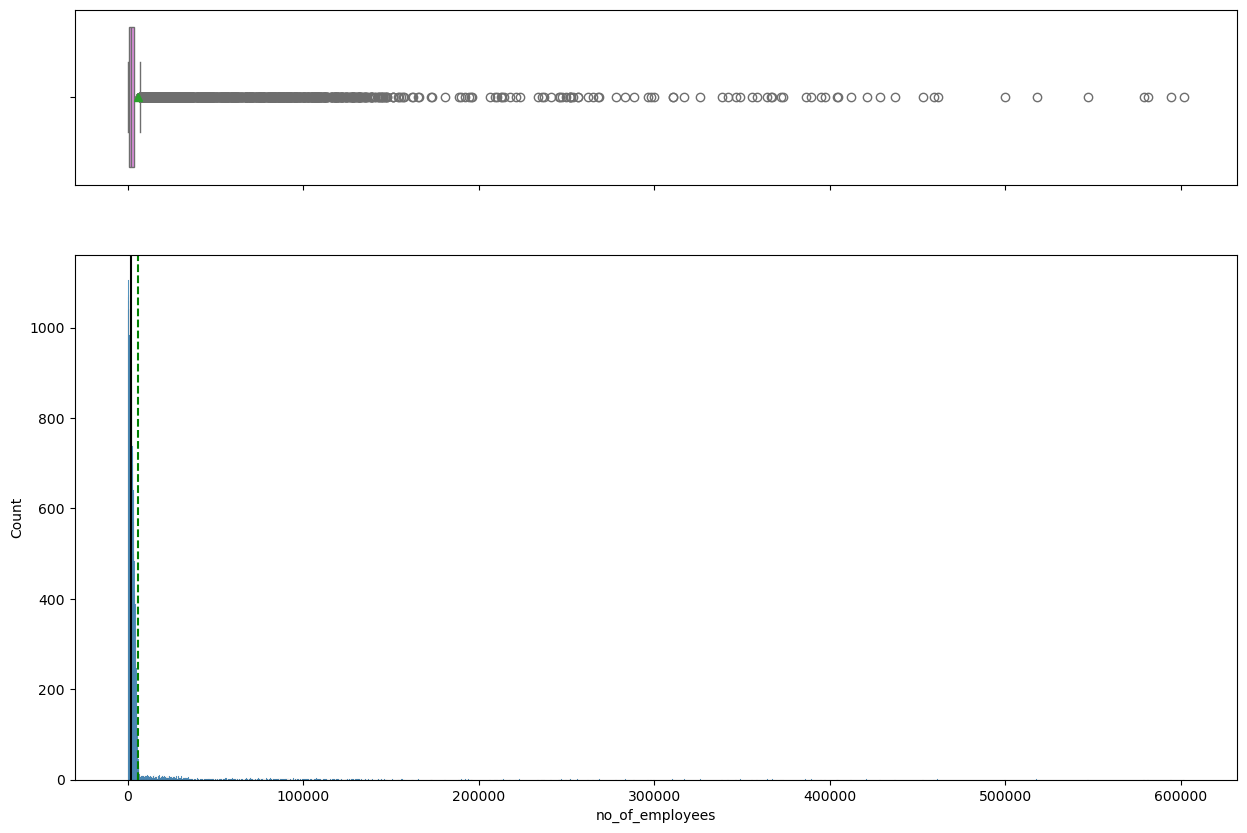

In [ ]:
histogram_boxplot(data,'no_of_employees')

#### Observation :
- the distribution of the number of employees is extremly skewed to the right
- It can be implied that the dataset has small companies, medium companies, and large international companies

#### 2 Observations on prevailing wage

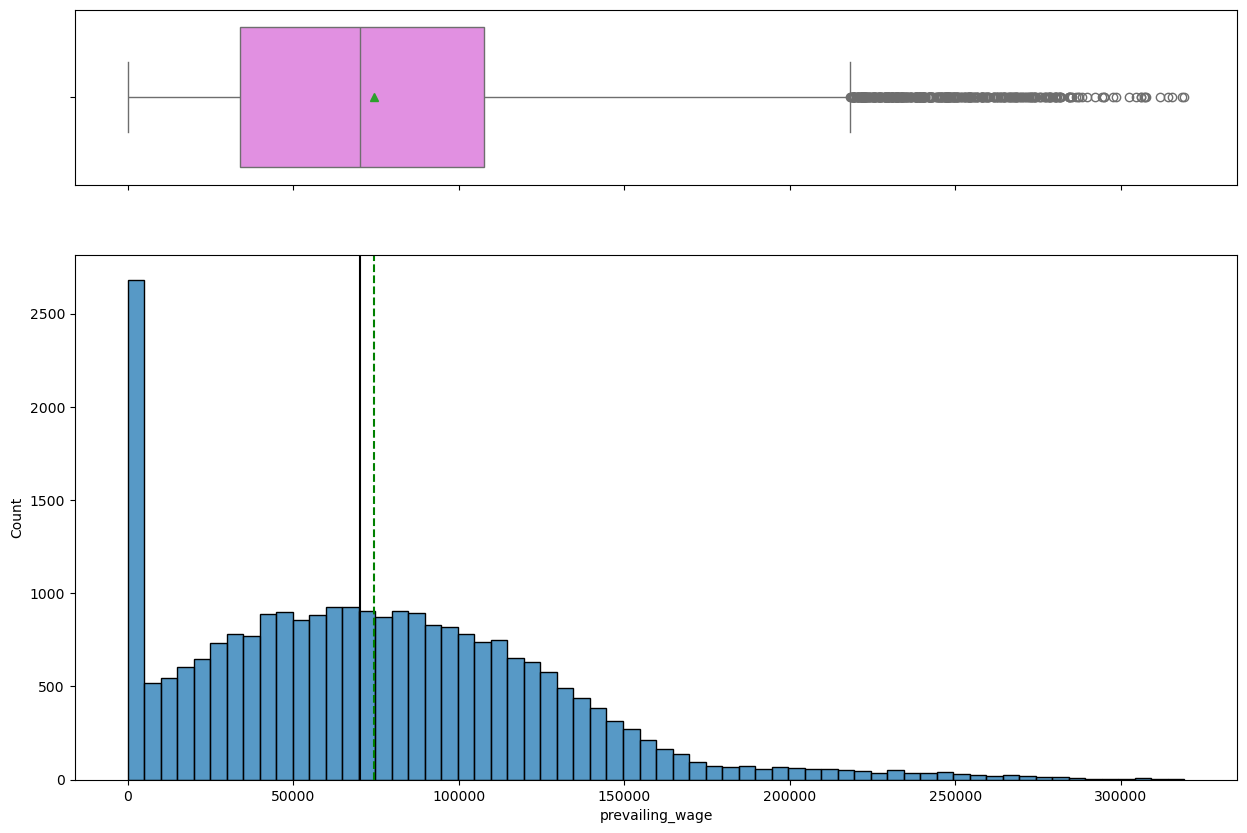

In [ ]:
histogram_boxplot(data,'prevailing_wage')

#### Observation:
- the distribution of the prevailing wage is skewed to the right
- there is a huge difference between wages among applicants
- there are applicants whose wage is more than 150,000
- there are applicants whose wage is around 0 and there are alot of them, we might need to check this
- it could be that some wages are entered as hourly base while others as yearly base

#### 3 Observations on continent

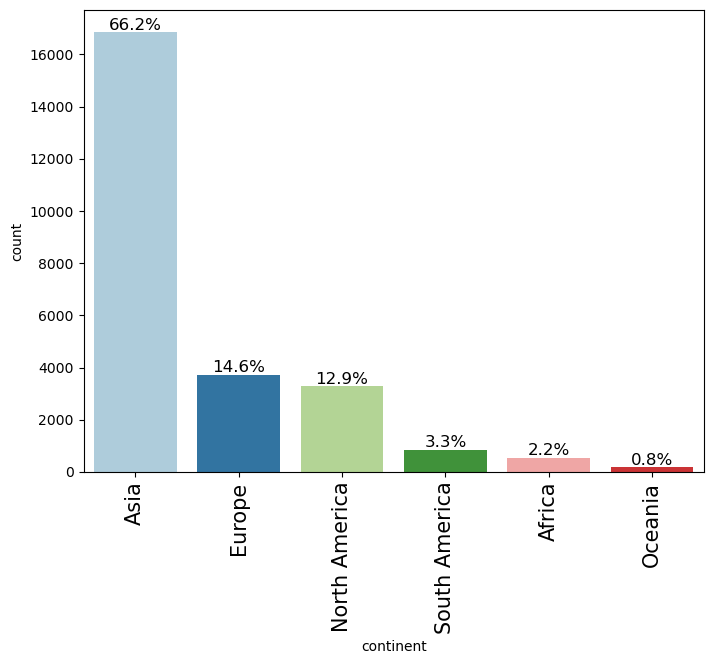

In [ ]:
labeled_barplot(data, "continent", perc=True)

#### Observation:
- 66% are coming from Asia, 15% are coming from EU, and 13% are coming from North Amercia

### 4 Observations on education of employee

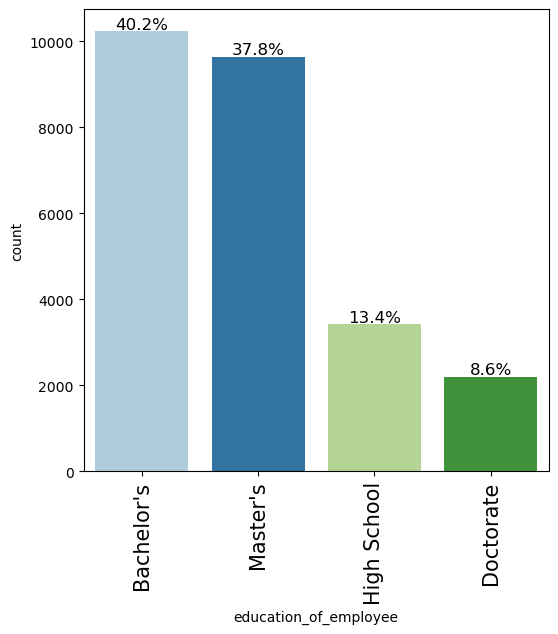

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

#### Observation
- 40.2% of the applicants have a bachelor's degree, followed by 37.8% having a master's degree.
- 8.6% of the applicants have a doctorate degree.

### 5 Observations on job experience

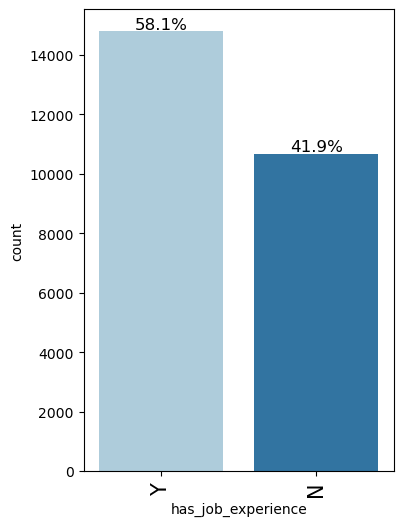

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)

#### Observation:
- 58.1% of the applicants have job experience

#### 6 Observations on job training

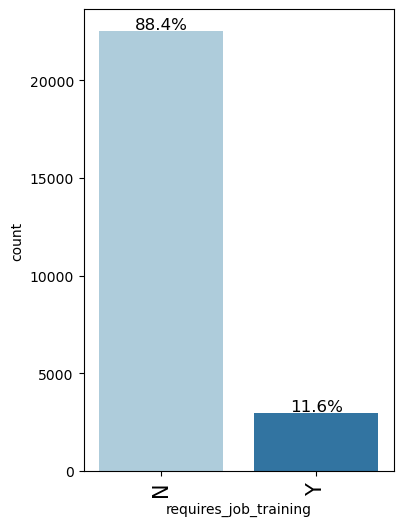

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True)

#### Observation:
- 88.4% of the applicants do not require any job training

#### 7 Observations on region of employment

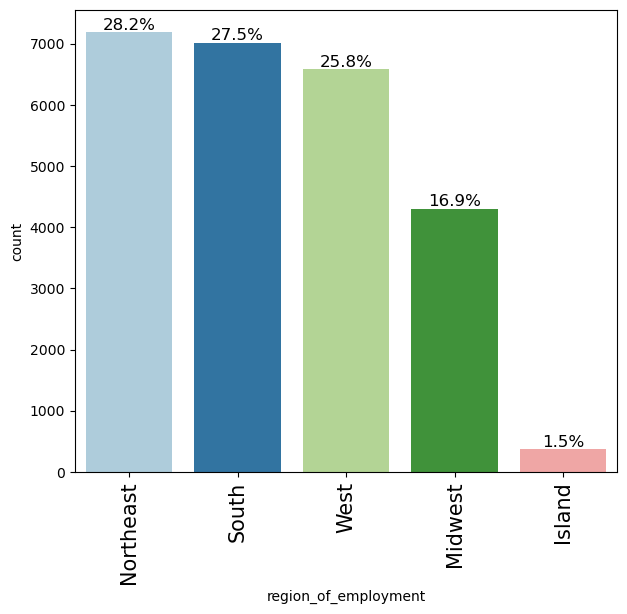

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)

#### Observation:
- Northeast, South, and West are equally distributed
- The Island regions have only 1.5% of the applicants

#### 8 Observations on unit of wage

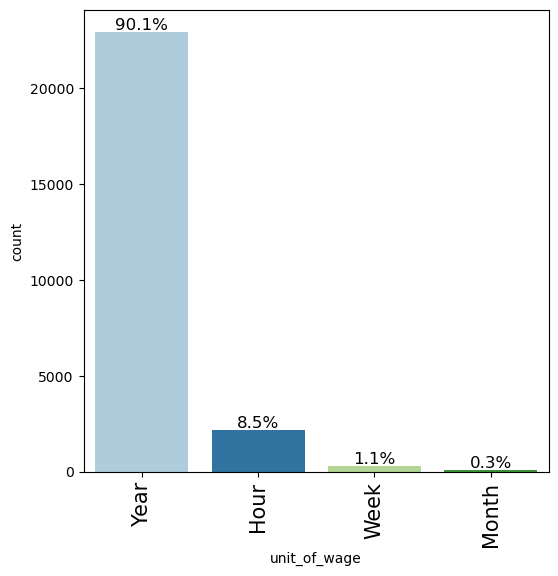

In [ ]:
labeled_barplot(data, "unit_of_wage", perc=True)

#### Observation:
- 90.1% of the applicants have a yearly unit of the wage

#### 9 Observations on case status

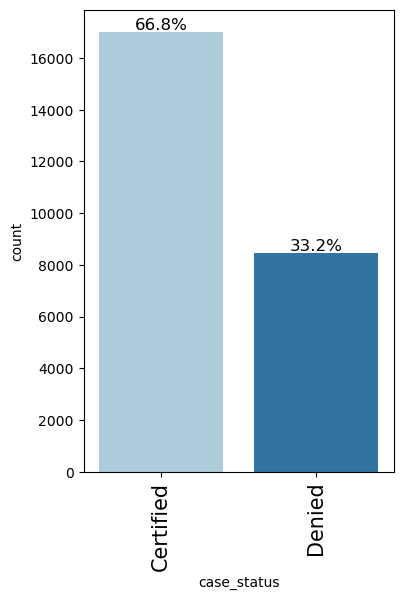

In [ ]:
labeled_barplot(data, "case_status", perc=True)

#### Observation:
- 66.8% of the visas were certified.

## Bivariate Analysis

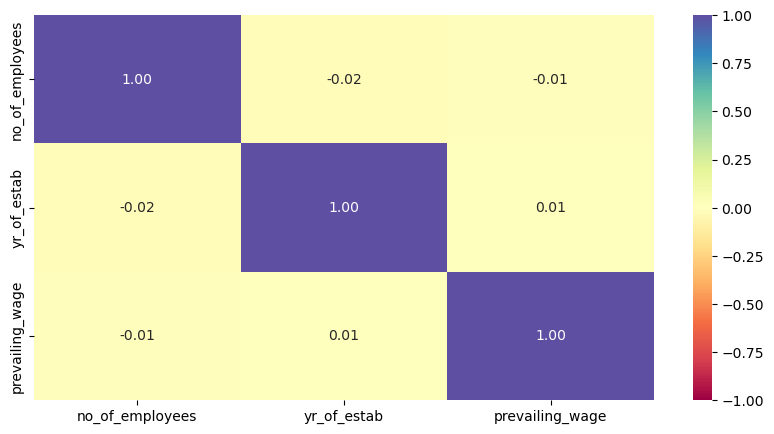

In [ ]:
# seperate the numerical values
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# create the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observation:

- we cannot see any correlation between the numerical variables

In [ ]:
def stackedbarplotperc(category1, category2):
    # Create the cross-tabulation
    cross_tab = pd.crosstab(category1, category2)
    print(cross_tab)

    # Normalize to get percentage ratios
    cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0)

    # Plot the stacked bar plot with percentages
    ax = cross_tab_percentage.plot(kind='bar', stacked=True, figsize=(10, 7))

    # Add percentage labels
    for c in ax.containers:
        # Optional: If you want to set the labels to be inside the bars
        labels = [f'{v:.1%}' if v > 0 else '' for v in c.datavalues]
        ax.bar_label(c, labels=labels, label_type='center')

    plt.ylabel('Percentage')
    plt.legend(title=category2.name, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [ ]:
def box_and_dist_plot(numerical, categorical):
    # Create a figure with two subplots: one for the box plot and one for the dist plot
    fig, (ax_box, ax_dist) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

    # Box Plot
    sns.boxplot(x=categorical, y=numerical, ax=ax_box)
    ax_box.set_title('Box Plot of Numerical vs Categorical')
    ax_box.set_xlabel(categorical.name)
    ax_box.set_ylabel(numerical.name)

    # Dist Plot
    for category in categorical.unique():
        sns.kdeplot(numerical[categorical == category], ax=ax_dist, label=category)
    ax_dist.set_title('Distribution Plot of Numerical by Categorical')
    ax_dist.set_xlabel(numerical.name)
    ax_dist.set_ylabel('Density')
    ax_dist.legend(title=categorical.name)

    plt.tight_layout()
    plt.show()


#### 1. Education vs case status

case_status            Certified  Denied
education_of_employee                   
Bachelor's                  6367    3867
Doctorate                   1912     280
High School                 1164    2256
Master's                    7575    2059


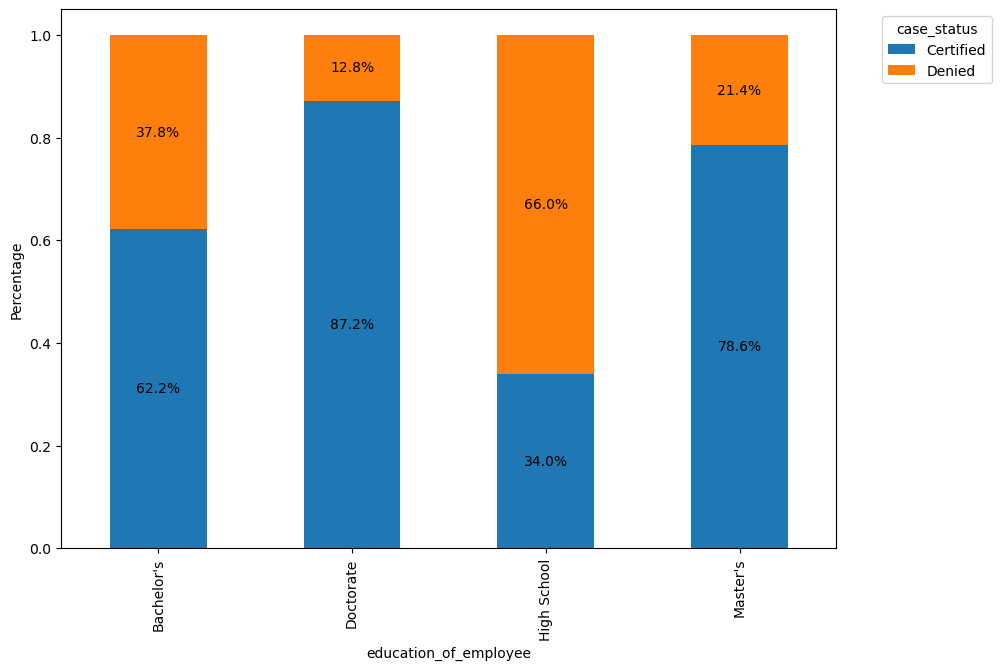

In [ ]:
stackedbarplotperc(data['education_of_employee'],data['case_status'])

#### Observation:
- Education is playing important role in visa certification.  Higher the education, the more chance to get certified

#### 2. Continent vs case status

case_status    Certified  Denied
continent                       
Africa               397     154
Asia               11012    5849
Europe              2957     775
North America       2037    1255
Oceania              122      70
South America        493     359


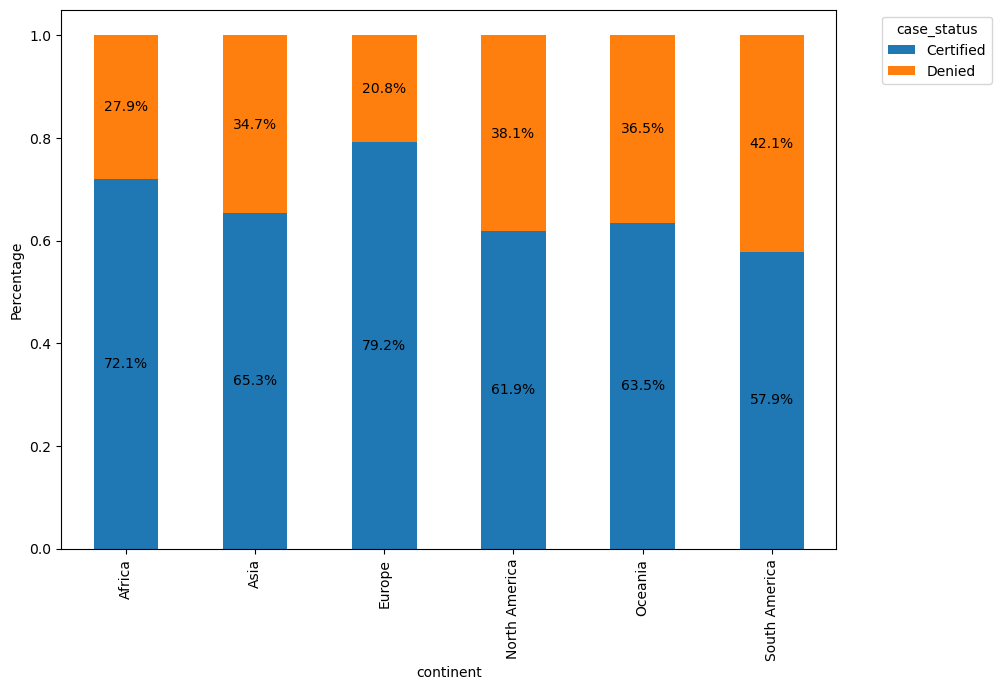

In [ ]:
stackedbarplotperc(data['continent'],data['case_status'])

#### Observation:
- EU has the highest chance of getting certified, while South America has the loest chance

#### 3. Job experience vs case status

case_status         Certified  Denied
has_job_experience                   
N                        5994    4684
Y                       11024    3778


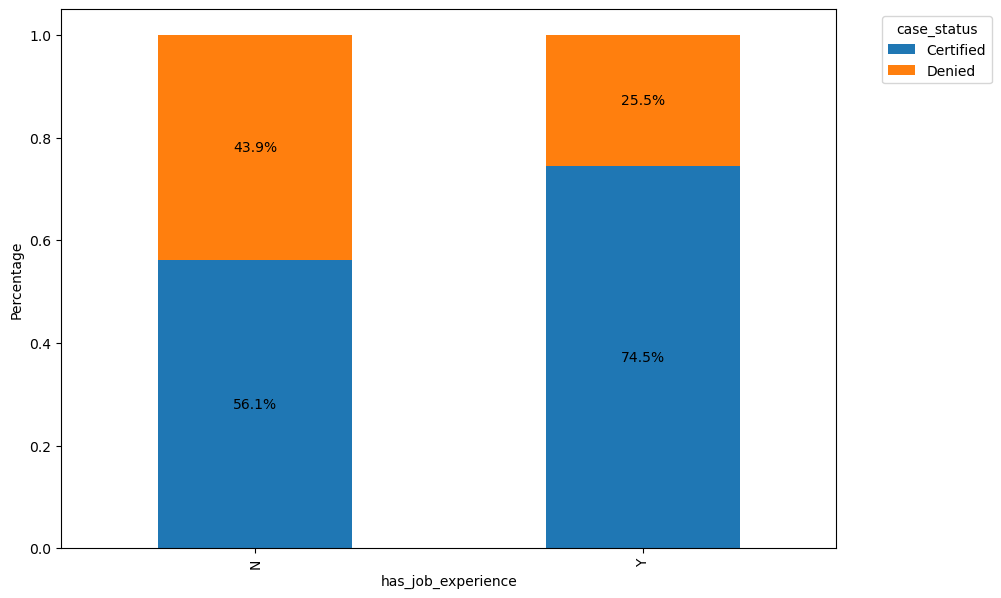

In [ ]:
stackedbarplotperc(data['has_job_experience'],data['case_status'])

#### Observation:
- Experience plays an important role in visa certification. Applicants with job experience have more chances of getting certified

#### 4. Unit of wage vs case status

case_status   Certified  Denied
unit_of_wage                   
Hour                747    1410
Month                55      34
Week                169     103
Year              16047    6915


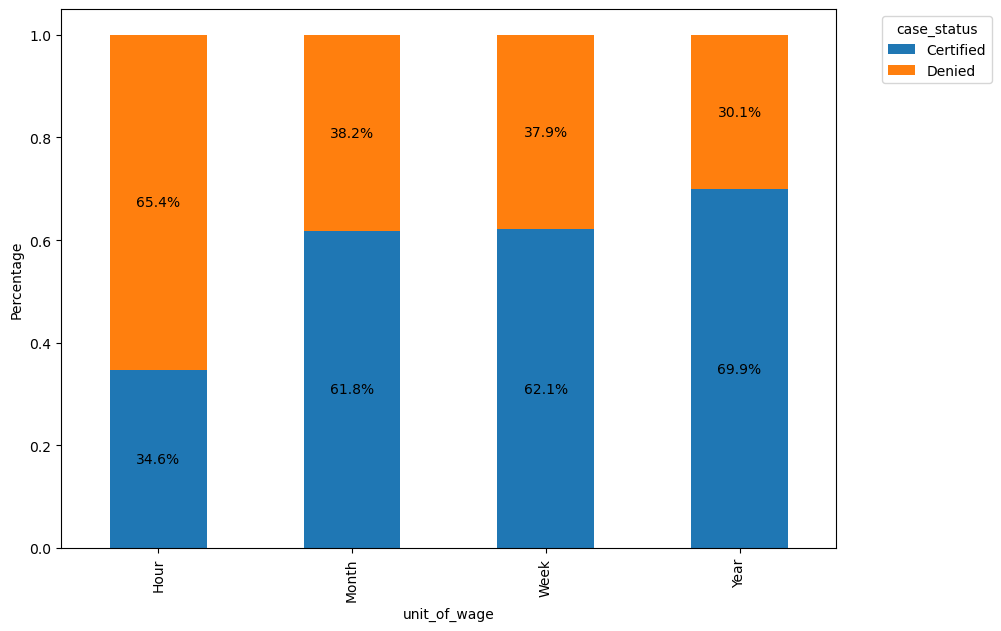

In [ ]:
stackedbarplotperc(data['unit_of_wage'],data['case_status'])

#### Observation:
- Hourly waged applicants are more likely to get denied while yearly are more likley to get certified

#### 5. Prevailing_wage vs case status

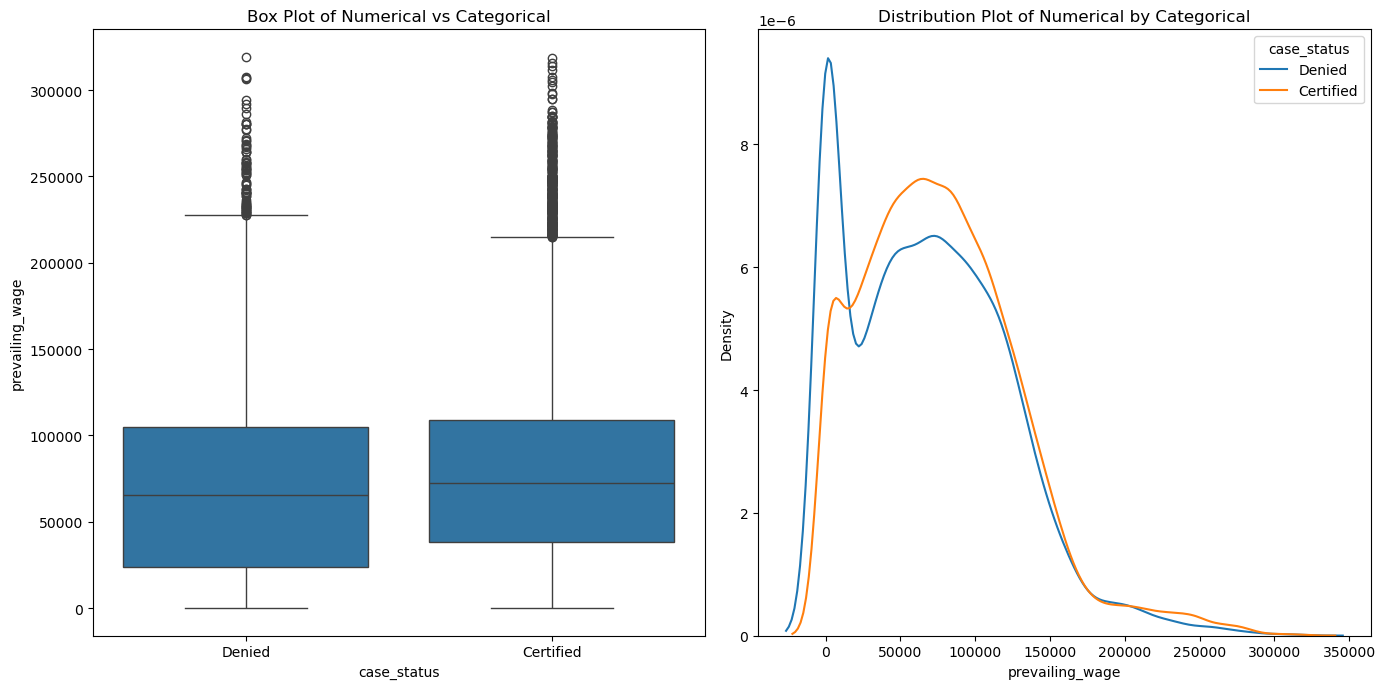

In [ ]:
box_and_dist_plot(data['prevailing_wage'],data['case_status'])

#### Observation:
- The median prevailing wage for the certified applications is slightly higher as compared to denied applications.


#### 8. Region vs wage

<Axes: xlabel='region_of_employment', ylabel='prevailing_wage'>

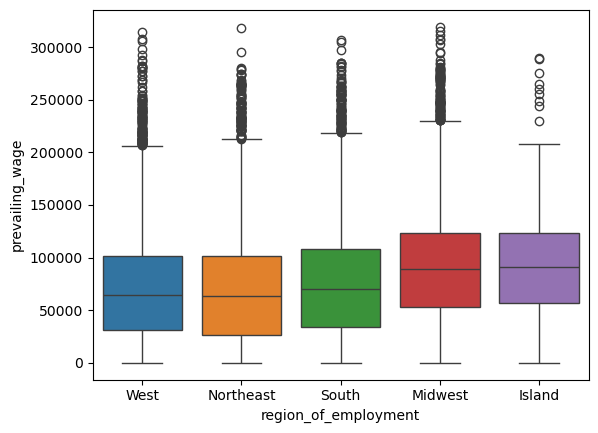

In [ ]:
sns.boxplot(data=data,x=data['region_of_employment'],y=data['prevailing_wage'],hue='region_of_employment')

#### Observation:
- prevailing wages is higher in Midwest and Island

## Outlier Detection

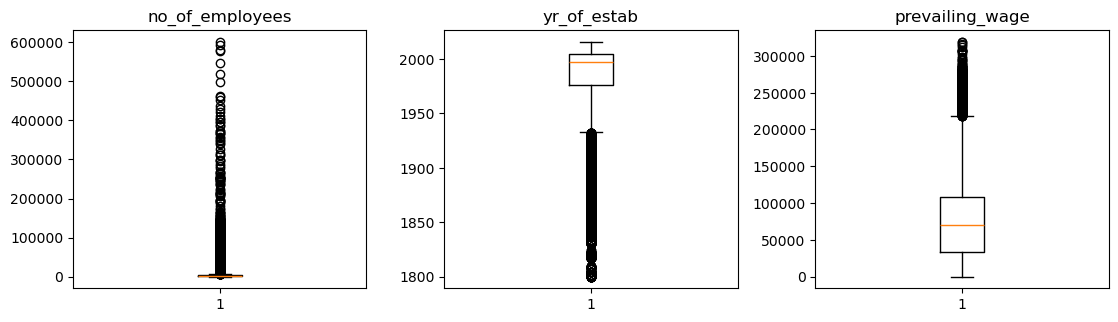

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation
- As there are many outlier so we will keep them as they might contain useful information

## Data Preparation for modeling

In [ ]:
#encode Certified as 1 and Denied as 0
encoding_map = {'Certified': 1, 'Denied': 0}
data['case_status']=data['case_status'].map(encoding_map)
data['case_status'].value_counts()

case_status
1    17018
0     8462
Name: count, dtype: int64

In [ ]:
#Split the data in test and train
X=data.drop('case_status',axis=1)
y=data.pop('case_status')

In [ ]:
X.shape

(25480, 10)

In [ ]:
# create dummy varialbes for categories
X=pd.get_dummies(X,drop_first=True)


In [ ]:
X.shape

(25480, 21)

#### Observation:
- As we have create dummy variable for categorical variable now we have 21 column compare to 10 column earlier

In [ ]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

## Model Evaluation Criterion

- if Model predicted visa application as certified while it should be denied --false positive
- if Model predicted visa application as denied while it should be certified -- false negative

Which case is more important
 - Both cases are important
 - if application certified to a wrong person than a US citizen will miss opportunity to work in that position
 - If application denied while it has to be certified U.S. will use a good resource

 So we can look for F1_score as a parameter high value of F1_score means minimazing chances of False Negative and False Positives

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

In [ ]:
model=DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

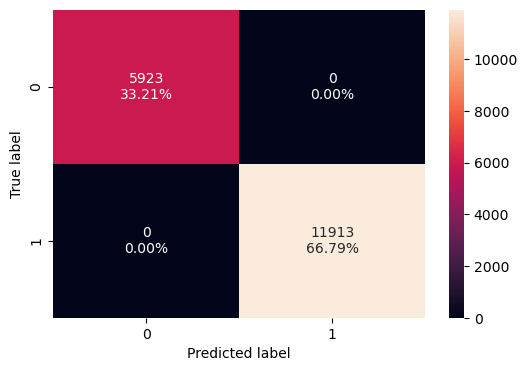

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


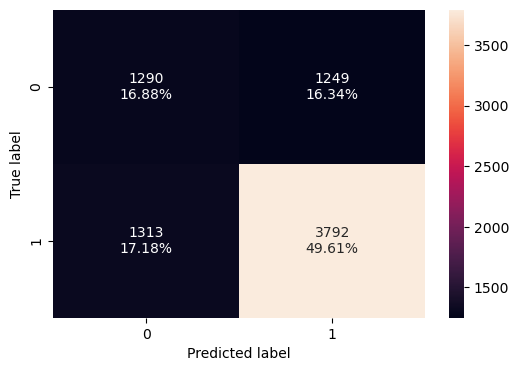

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


#### Observation:
- There is significant difference between training and test observations.
- Decision Tree is overfitting


### Hyperparameter Tuning - Decision Tree

In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree classifier
dtree_estimator = DecisionTreeClassifier()
scorer = metrics.make_scorer(metrics.f1_score)
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dtree_estimator, param_grid=param_grid, cv=5, scoring=scorer)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

dtree_estimator = grid_search.best_estimator_

dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_leaf=4, min_samples_split=5)

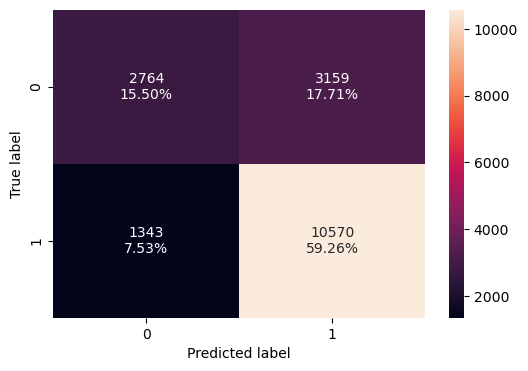

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [ ]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.747589,0.887266,0.769903,0.824429


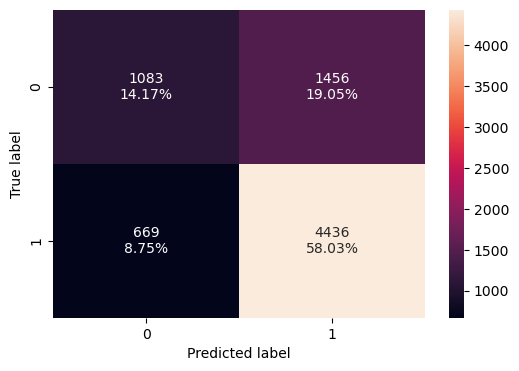

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [ ]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.722004,0.868952,0.752885,0.806765


#### Observation:
- Model seems to be good fit as traing and test observation are close and mode is not suffering with overfitting

## Bagging - Model Building and Hyperparameter Tuning

In [ ]:
bagging_classifier=BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

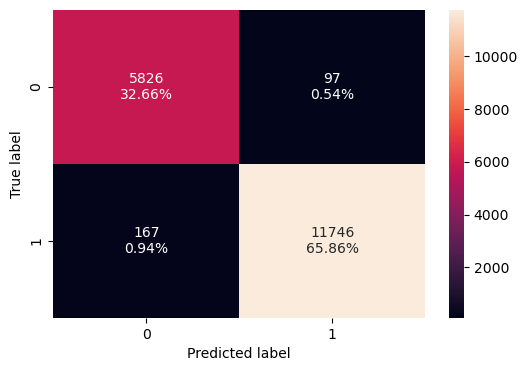

In [ ]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [ ]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


#### Checking model performance on test set

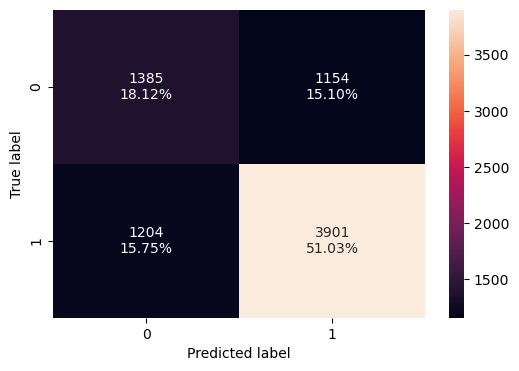

In [ ]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [ ]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


#### Observation:
- Model seems to be overfitting the data as there is significant difference between training and test performance

### Hyperparameter Tuning - Bagging Classifier

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
     "max_samples": [0.7, 0.8, 0.9],
     "max_features": [0.7, 0.8, 0.9],
    "n_estimators": np.arange(10, 50, 100),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}


BaggingClassifier(max_features=0.8, max_samples=0.7, n_estimators=np.int64(10),
                  random_state=1)

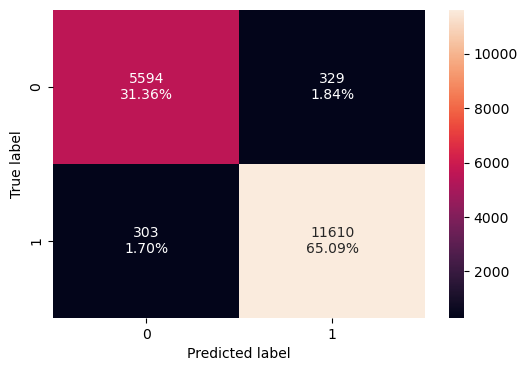

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [ ]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.964566,0.974566,0.972443,0.973503


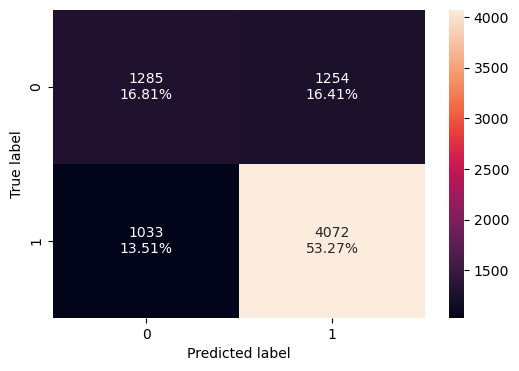

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [ ]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.700811,0.797649,0.764551,0.78075


#### Observation:
- Begging classifier is still overfitting after tuning

## Random Forest

In [ ]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight="balanced")
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

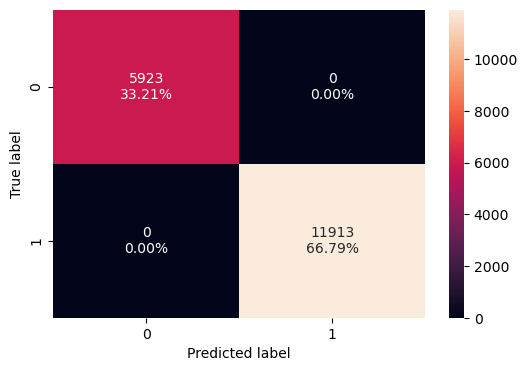

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [ ]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


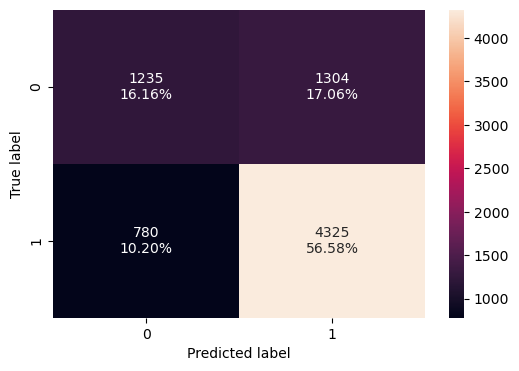

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [ ]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


#### Observation:
- There is significant difference between training and test observations
- Random forest model is  overfitting 

### Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_
print(grid_obj.best_params_)
# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

{'max_depth': np.int64(10), 'max_features': 'sqrt', 'min_samples_split': 7, 'n_estimators': np.int64(20)}


RandomForestClassifier(max_depth=np.int64(10), min_samples_split=7,
                       n_estimators=np.int64(20), random_state=1)

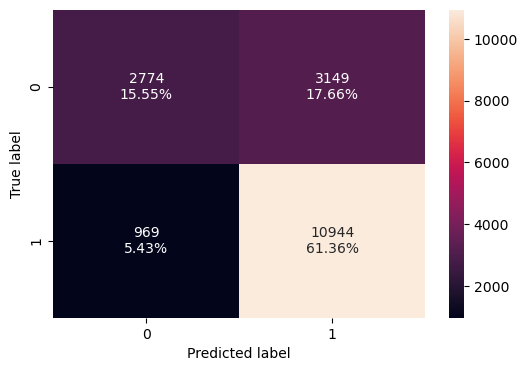

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [ ]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


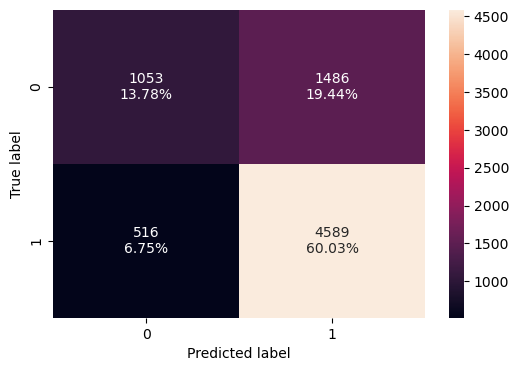

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [ ]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


#### Observation:
- After tunning Random Forest is giving generalized performance

## Boosting - Model Building and Hyperparameter Tuning

### Gradient Boosting Classifier

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

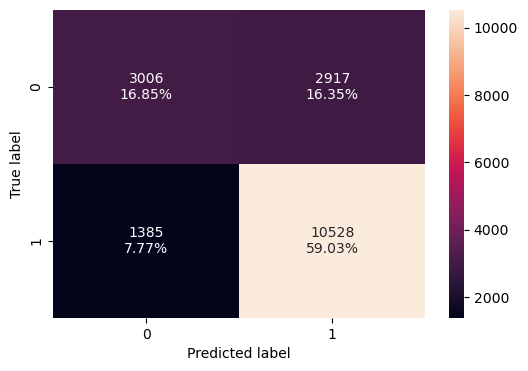

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [ ]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


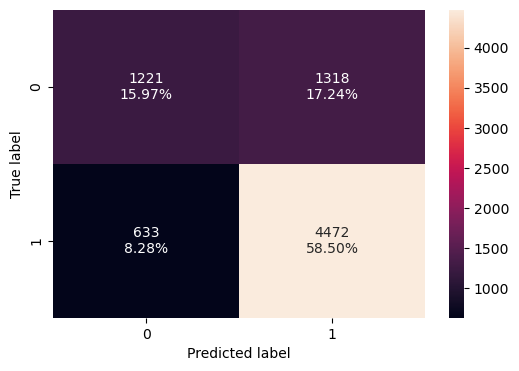

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [ ]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


#### Obervation:
- Model is giving generalized and good performance
- We can check after tunning hyper paramerter as well

### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier( random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [50, 100, 150],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_
print(grid_obj.best_params_)

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

{'learning_rate': np.float64(0.1), 'max_features': 0.8, 'n_estimators': 50, 'subsample': 0.8}


GradientBoostingClassifier(learning_rate=np.float64(0.1), max_features=0.8,
                           n_estimators=50, random_state=1, subsample=0.8)

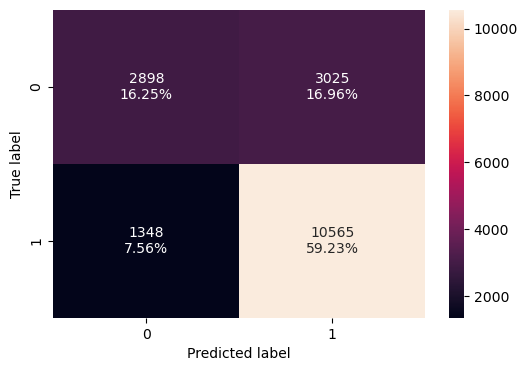

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.754822,0.886846,0.77741,0.82853


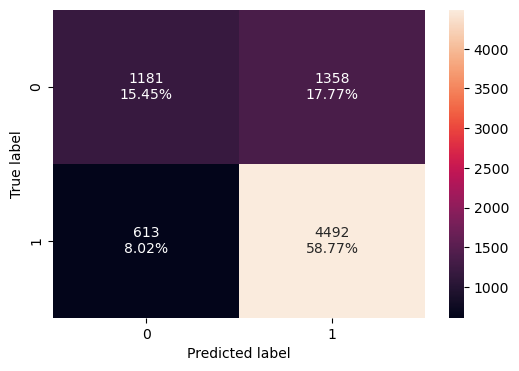

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742151,0.879922,0.767863,0.820082


#### Observation:
- Gradient Boost performance is quite similar after tunning

### AdaBoost Classifier

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

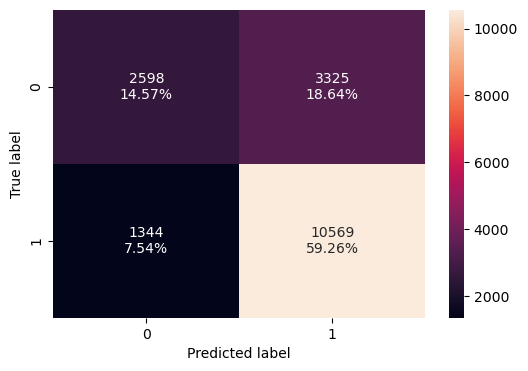

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


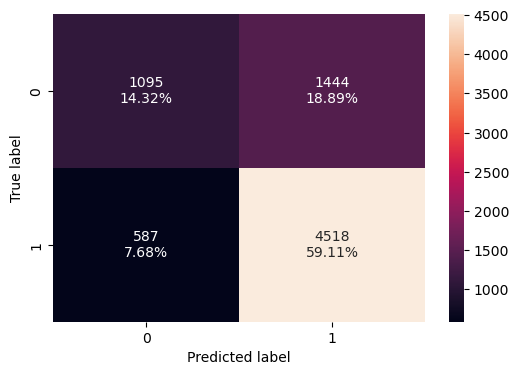

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


#### Obervation:
-  Adaboost classifier Model is giving generalized performance
- We can check performance hyperparameter tunning

### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(60, 100, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1,
                                                    random_state=1),
                   learning_rate=np.float64(0.1), n_estimators=np.int64(90),
                   random_state=1)

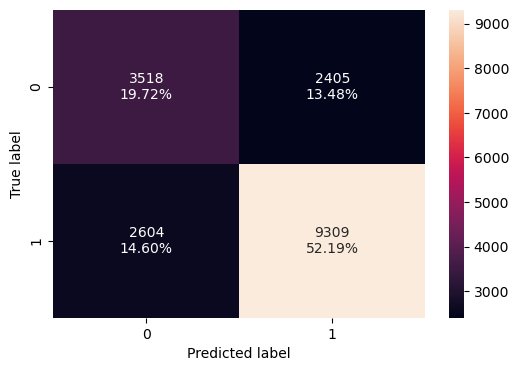

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.719163,0.781415,0.79469,0.787997


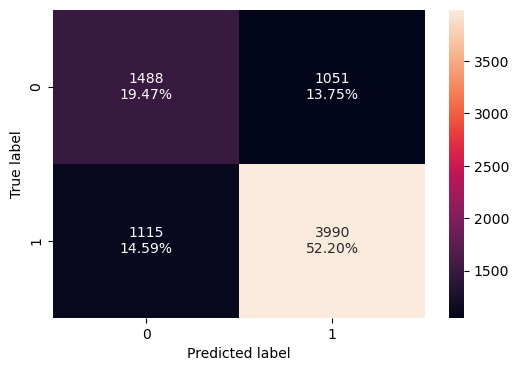

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.716641,0.781587,0.79151,0.786517


#### Obervation:
- After Adaboost classifier Tuning F1 Score has been reduced

## Model Comparison and final Model selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_estimator_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",

]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,0.747589,0.747589,0.985198,0.964566,1.0,0.769119,0.738226,0.719163,0.758802,0.754822
Recall,0.887266,0.887266,0.985982,0.974566,1.0,0.918660,0.887182,0.781415,0.883740,0.886846
Precision,0.769903,0.769903,0.991810,0.972443,1.0,0.776556,0.760688,0.794690,0.783042,0.777410
F1,0.824429,0.824429,0.988887,0.973503,1.0,0.841652,0.819080,0.787997,0.830349,0.828530


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_estimator_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,

    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
  ]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,0.722004,0.722004,0.691523,0.700811,0.727368,0.738095,0.734301,0.716641,0.744767,0.742151
Recall,0.868952,0.868952,0.764153,0.797649,0.847209,0.898923,0.885015,0.781587,0.876004,0.879922
Precision,0.752885,0.752885,0.771711,0.764551,0.768343,0.755391,0.757799,0.791510,0.772366,0.767863
F1,0.806765,0.806765,0.767913,0.780750,0.805851,0.820930,0.816481,0.786517,0.820927,0.820082


#### Observation:
- From above comparison we can see that Tuned Random Forest is performing very well
- We will use Tune Random Forest as our final Model

### Important features of the final model

In [ ]:
## Calculating feature importance
feat_imp_dict = dict(zip(X_train.columns, rf_tuned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index', columns=['importance'])
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

print(feat_imp)

                                   importance
education_of_employee_High School    0.234452
prevailing_wage                      0.150029
has_job_experience_Y                 0.118696
education_of_employee_Master's       0.085766
no_of_employees                      0.067280
yr_of_estab                          0.058228
education_of_employee_Doctorate      0.055792
unit_of_wage_Year                    0.046702
continent_Europe                     0.041715
region_of_employment_Midwest         0.024973
continent_Asia                       0.016195
region_of_employment_West            0.015561
full_time_position_Y                 0.014733
region_of_employment_South           0.014553
continent_North America              0.013878
requires_job_training_Y              0.012244
region_of_employment_Northeast       0.010722
continent_South America              0.008815
unit_of_wage_Week                    0.004329
continent_Oceania                    0.003455
unit_of_wage_Month                

### Observation:
- Top three important features to look for while certifying a visa are  education of the employee, Prevailing Wage and job experience

## Actionable Insights & Recommendations


**The profile of applicants for whom visa status can get approved**

  **the best profile is**
-   `Education Level`: People with higher education minimun Bachelor's level.
-   `Prevailing Wage` : Median wage of the Employee for whom visa got certified is around 72k.
-   `Job Experience` : Should have job experience.
 **Secondary information to look at**
- `Unit of wage` :  Applicants having year unit of wage.
- `Continent` : Applicants from Europe , Asia have higher chance to get visa certified.
- `Region of employment` : Our analysis suggests that the applications to work in the Mid-West region have more chances of visa approval .

**The profile of the applicants for whom the visa status can be denied:**


**Primary information to look at:**
-  `Education level` - Doesn't have any degree and has completed high school.
- `Job Experience` - Doesn't have any job experience.
- `Prevailing wage` - The median prevailing wage of the employees for whom the visa got denied is around 65k.

**Secondary information to look at:**

- `Unit of Wage`    - Applicants having an hourly unit of wage.
- `Continent`       - It has been observed that applicants from South America, North America have higher chances of visa applications getting denied.

**Recommendatons :**

> Applicants with higher educational qualification needs to be highlighted in the visa application procedure for higher acceptance rate.
    
> Competititive existing wages provide greater success in the visa application process.
    
> Applicants with job experience needs to be preferred to avoid rejection and less processing of applications.
    
> Companies with high no of employees can be preferred in terms of stability and economic viablity for long term.
    

**Additional information of employers and employees can be collected to gain better insights. Information such as:** 
   * Employers: Information about  the wage they are offering to the applicant, Sector in which company operates in, etc
   * Employee's: Specialization in their educational degree, Number of years of experience, etc